### Homework 5
### Ben Christensen
### March 21, 2018

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

In [2]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

### 1. PCA

#### a)

In [3]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)


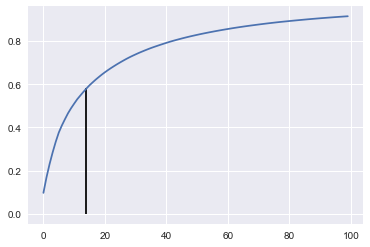

In [4]:
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[14],x=14)

14 dimensions seems to fall right at the elbow, so that's the number of components I'll use.

#### b)

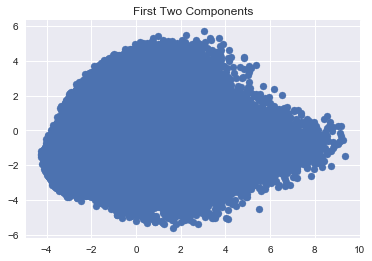

In [5]:
pca = PCA(n_components=14)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("First Two Components")

The data seems to be clustered around (2,0). Other than that, not much of a trend. We've projected the data onto 14 dimensions, so this shows us variance in the first two directions.

#### c) I would use PCA if I had so many variables that K-Nearest neighbors and other techniques would be too difficult. My prediction may be faster and more potent if I have 14 variabled to test and predict on.

#### d)

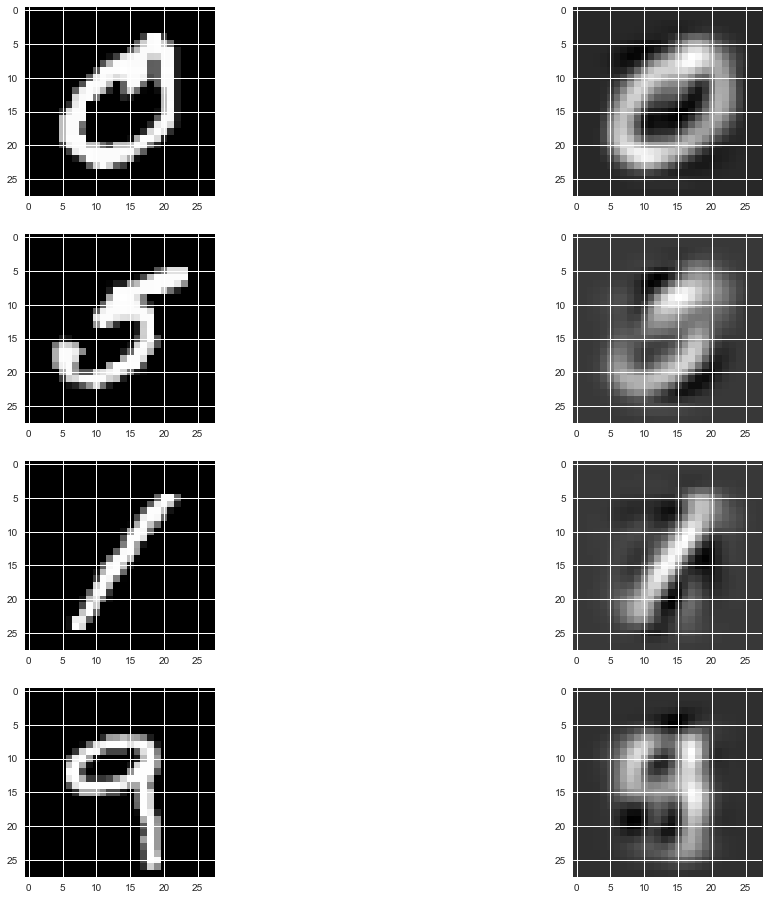

In [6]:
fig = plt.figure(figsize=(18, 16))
for i, index in enumerate([1, 36000, 12467, 57000]):
    img = X[index].reshape((28,28))
    plt.subplot(4,2,2*i+1)
    plt.imshow(img, cmap='gray')
    plt.subplot(4, 2, 2*i+2)
    temp = pca.inverse_transform(X_pca[index])
    comp_img = temp.reshape((28,28))
    plt.imshow(comp_img, cmap='gray')
plt.show()

The 1 and 0 look right, but the 5 almost looks like a 0 and the 9 almost looks like an 8 or a 4.

### 2. t-SNE

In [7]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

In [8]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.319106
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.210100
[t-SNE] Error after 275 iterations: 1.210100


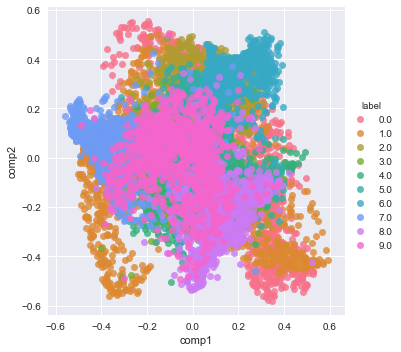

In [9]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)


This differs from the PCA plot because it has colors for the different numbers so I can tell how good the differentiation is. Removing the colors, theplots would look remarkably similar, jut rotated.

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 292 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.541652
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.847887
[t-SNE] Error after 75 iterations: 0.847887


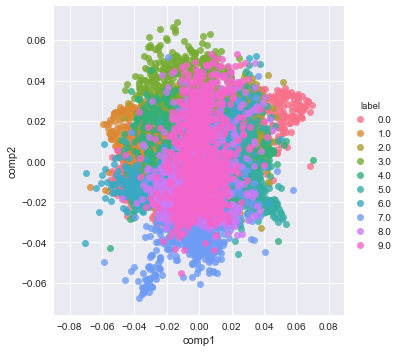

In [10]:
tsne = TSNE(n_components=2, verbose=1, perplexity=97, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)



Wow, this is much different from the previous graph. It does not appear to be robust to changes in perplexity (I changed perplexity from 50 to 97).

Here I change the learning rate from 200 to 50 and the graph changes drastically. 

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.319106
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.210136
[t-SNE] Error after 75 iterations: 1.210136


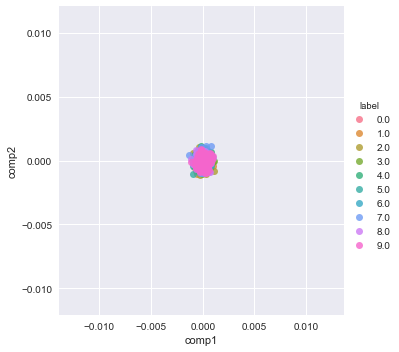

In [11]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)



This looks cool! I increased the learning rate from 200 to 1000. It also changed the graph drastically. It doesn't appear to be robust to changes in the learning rate.

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.319106
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.151663
[t-SNE] Error after 325 iterations: 1.151663


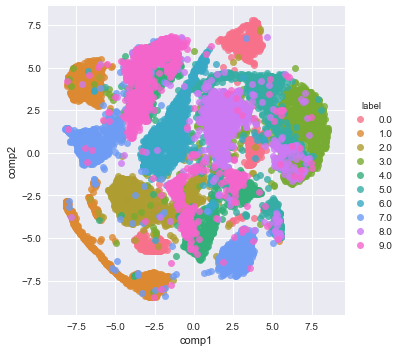

In [12]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=1000)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)



This is changing the number of iterations from 1,000 to 10,000

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.319106
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.210098
[t-SNE] Error after 300 iterations: 1.210098


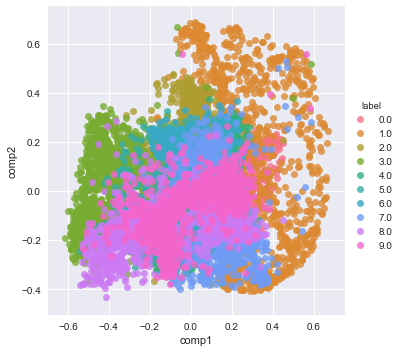

In [13]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=10000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)



This appears similar to the original graph. The next graph changes iterations from 1000 to 200.

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.319106
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.210073
[t-SNE] Error after 200 iterations: 1.210073


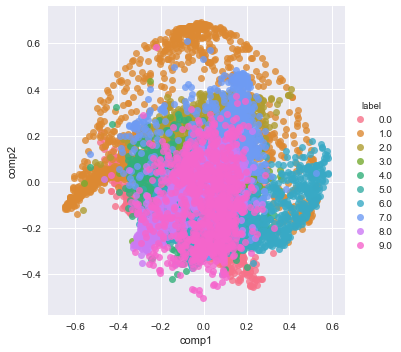

In [14]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=200, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)




Even this graph with far fewer iterations looks relatively similar to the original graph. I would say t-SNE is relatively robust to changes in number of iterations.

### 3. K-Means Clustering


There are 10 numbers so I used 10 clusters

In [15]:
kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans.fit(X)
sk_clusters = kmeans.predict(X)



In [16]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])




[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.201330
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.198928
[t-SNE] Error after 250 iterations: 1.198928


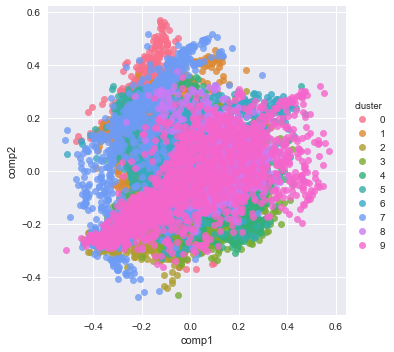

In [17]:
df_tsne["cluster"]  = sk_clusters[rows[:n_select]]
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='cluster', fit_reg=False)

I didn't scale the data because they are already on the same scale.

Obviously, the clusters aren't very distinctive. (The clustering did a bad job).

Below we change perplexity from 50 to 97

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 292 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.428969
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.861061
[t-SNE] Error after 250 iterations: 0.861061


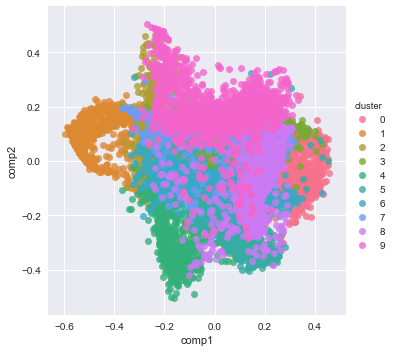

In [18]:
tsne = TSNE(n_components=2, verbose=1, perplexity=97, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne["cluster"]  = sk_clusters[rows[:n_select]]
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='cluster', fit_reg=False)



The clustering is pretty robust to change in perplexity.

### 4. Hierarchical Clustering

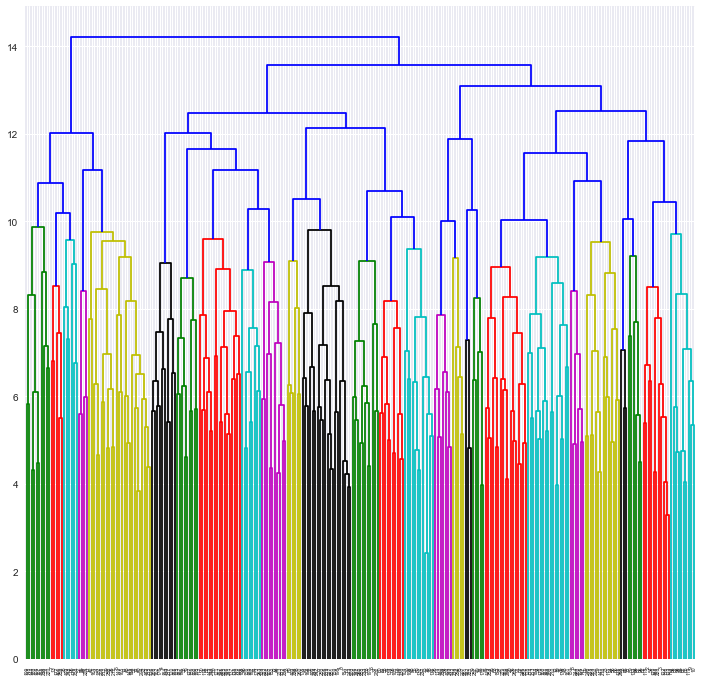

In [19]:
Z = linkage(X[:267,:], 'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

About 12-14 clusters looks reasonable to me according to this dendrogram.

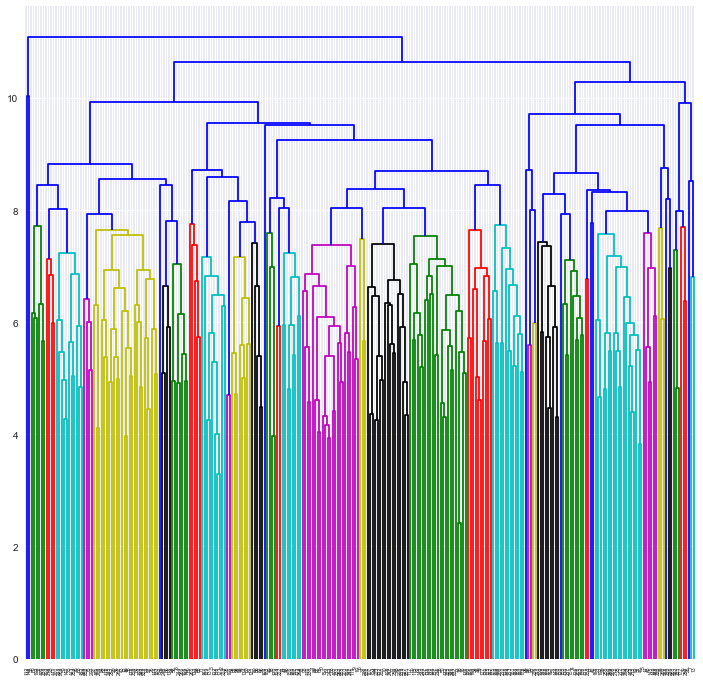

In [20]:
Z = linkage(X[:267,:], 'average')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

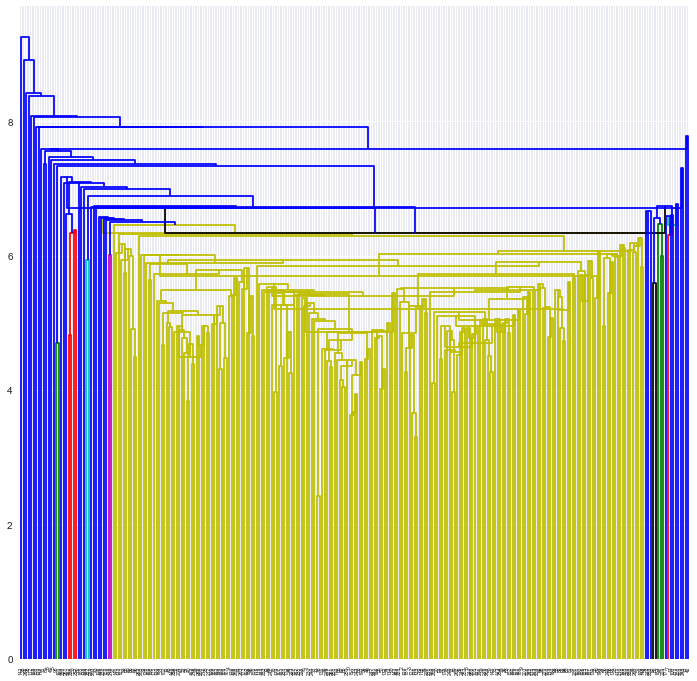

In [21]:
Z = linkage(X[:267,:], 'centroid')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

Some of the changes are drastic for the dendrogram and others are fairly small.